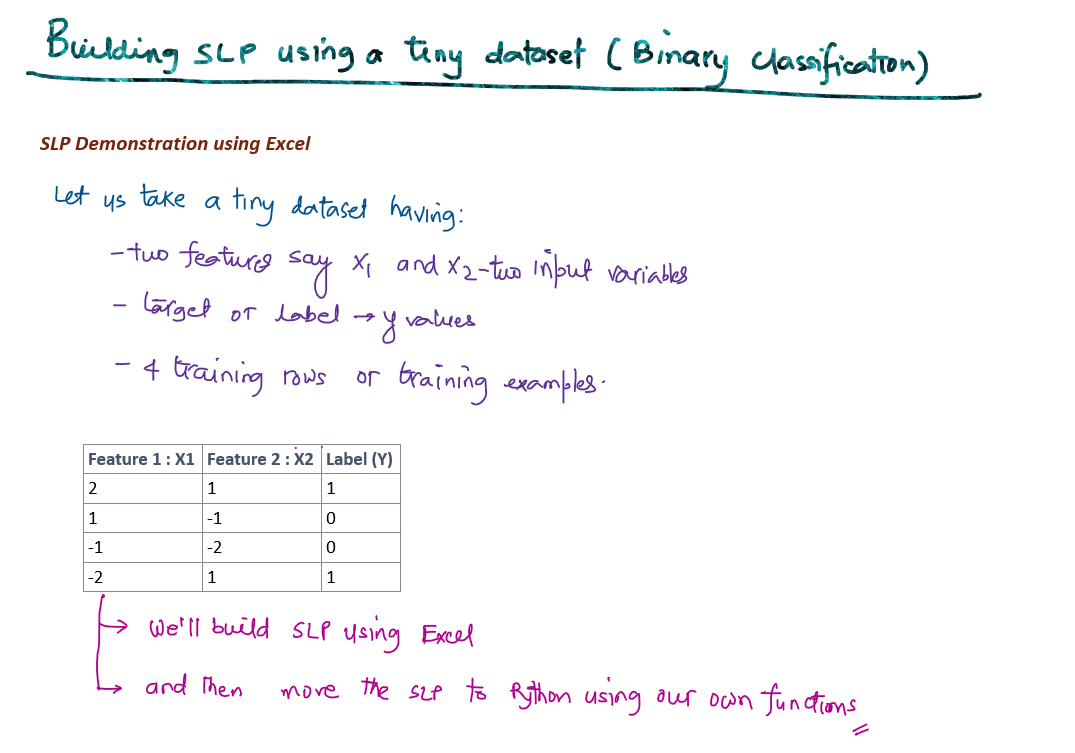`

#### `Activation Function`
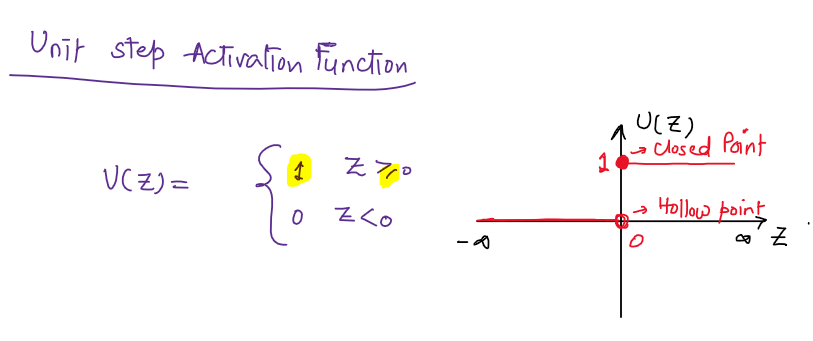

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the data

In [3]:
X = np.array(
    [[2, 1],
    [1, -1], 
    [-1, -2],
    [-2, 1]])

print("Input Feature Array:", X)

Input Feature Array: [[ 2  1]
 [ 1 -1]
 [-1 -2]
 [-2  1]]


In [4]:
Y = np.array([1, 0 , 0, 1])
Y

array([1, 0, 0, 1])

### 2. Define the `activation function`

##### `Unit Step Activation Function`

In [6]:
def step_af(z):
    return 1 if z>=0 else 0

In [7]:
step_af(0.000001)

1

In [8]:
step_af(0)

1

In [9]:
step_af(-0.0000000000000001)

0

### 3. Define `Single Layer Perceptron Model`

In [14]:
### 3.a. Compute Cost
def compute_cost(X,Y,W,b):
    '''
    X: Input Array
    Y: Target (Y labels)
    W: Weight Array
    b: bias
    '''
    total_errors = 0 # how many misclassifications have happened

    for i in range(len(X)):
        z = np.dot(W, X[i]) + b # weighted sum of inputs + bias --> one row at a time
        y_pred = step_af(z) # predicted value using unit step activation function

        if y_pred != Y[i]: # comparing predicted Y against actual Y
            total_errors += 1 #counting the instances of error
    return total_errors

#### 3.b. Let us create the SLP train

def slp_train(X, Y, W, b, alpha, epochs):
    ### Create the couple of empty lists to track historical updates
    errors_per_epoch = []
    accuracy_per_epoch = []

    ### Suppress scientific notation and control decimals
    np.set_printoptions(precision = 2, suppress = True)

    for epoch in range(epochs): # outer for loop
        print(f"\nEpoch# {epoch + 1}")

        total_errors = 0 # instances of mis-classification
        correct = 0 #instances of correct classification

        for i in range(len(X)): # inner for loop
            x = X[i] # picking a row - one at a time
            y = Y[i] # picking the target label for that specific row -- actual Y
            z = np.dot(W,x) + b # weighted sum of inputs + bias
            y_pred = step_af(z) # predicted Y
            error = y_pred - y # calculate error

            if error != 0: 
                ### Since there is an error, need to update weights & biases
                W = W - (alpha * (error * x))
                b = b - (alpha * error)
                total_errors += 1
            else:
                correct += 1
            cost = compute_cost(X, Y, W, b)
            # Well-formatted log output
            print(f"{'Input:':<10} {x}  "
                  f"{'Prediction:':<12} {y_pred}  "
                  f"{'Actual:':<8} {y}  "
                  f"{'Error:':<7} {error}  "
                  f"{'Weights:':<9} {W}  "
                  f"{'Bias:':<6} {b:.3f}  "
                  f"{'Cost:':<6} {cost}")

        errors_per_epoch.append(total_errors) #appending the historical errors
        accuracy_per_epoch.append(correct/len(X)) #appending the avg. correct instances

    return W, b, errors_per_epoch, accuracy_per_epoch

### Let us try running with `SLP` with `initial weights and biases` set by the modeler

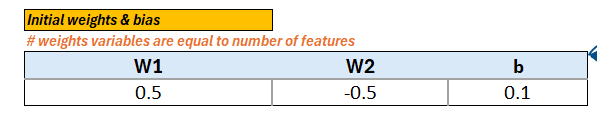

In [42]:
W = np.array([0.5, -0.5]) #weights are as many as number of X features--> number of input variables
b = 0.1
alpha = 0.1
epochs = 10

In [39]:
# W = np.array([500, -500]) #weights are as many as number of X features--> number of input variables
# b = 100
# alpha = 0.1
# epochs = 500

In [43]:
final_W, final_b, errors, accuracy = slp_train(X,Y,W,b, alpha, epochs)


Epoch# 1
Input:     [2 1]  Prediction:  1  Actual:  1  Error:  0  Weights:  [ 0.5 -0.5]  Bias:  0.100  Cost:  3
Input:     [ 1 -1]  Prediction:  1  Actual:  0  Error:  1  Weights:  [ 0.4 -0.4]  Bias:  0.000  Cost:  3
Input:     [-1 -2]  Prediction:  1  Actual:  0  Error:  1  Weights:  [ 0.5 -0.2]  Bias:  -0.100  Cost:  2
Input:     [-2  1]  Prediction:  0  Actual:  1  Error:  -1  Weights:  [ 0.3 -0.1]  Bias:  0.000  Cost:  2

Epoch# 2
Input:     [2 1]  Prediction:  1  Actual:  1  Error:  0  Weights:  [ 0.3 -0.1]  Bias:  0.000  Cost:  2
Input:     [ 1 -1]  Prediction:  1  Actual:  0  Error:  1  Weights:  [0.2 0. ]  Bias:  -0.100  Cost:  2
Input:     [-1 -2]  Prediction:  0  Actual:  0  Error:  0  Weights:  [0.2 0. ]  Bias:  -0.100  Cost:  2
Input:     [-2  1]  Prediction:  0  Actual:  1  Error:  -1  Weights:  [-0.   0.1]  Bias:  0.000  Cost:  0

Epoch# 3
Input:     [2 1]  Prediction:  1  Actual:  1  Error:  0  Weights:  [-0.   0.1]  Bias:  0.000  Cost:  0
Input:     [ 1 -1]  Prediction

### Let us do plotting

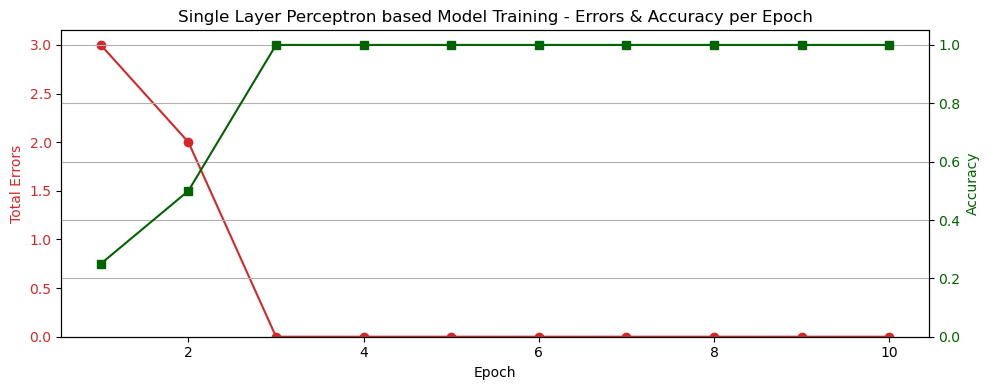

In [45]:
###  === Plot errors and accuracy in a single chart using primary & secondary axes === ###
fig, ax1 = plt.subplots(figsize = (10,4))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Total Errors', color = color)
ax1.plot(range(1, epochs + 1), errors, marker='o', color=color, label='Errors')
ax1.tick_params(axis='y', labelcolor= color)
ax1.set_ylim(bottom = 0)

ax2 = ax1.twinx()
color = 'darkgreen'
ax2.set_ylabel('Accuracy', color = color)
ax2.plot(range(1, epochs + 1), accuracy, marker='s', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor= color)
ax2.set_ylim(0, 1.05)

plt.title("Single Layer Perceptron based Model Training - Errors & Accuracy per Epoch")
fig.tight_layout()
plt.grid(True)
plt.show()